# Assessing the Effectiveness of VPD Bike Theft Prevention Programs

##### STAT 201 Group 32: Angela Felicia, Christin Wang, Linda Chu, Yifan Hao

## Introduction

Bike theft is a major issue in Vancouver. According to the Vancouver Police Department (VPD), over 2,000 bikes are stolen in Vancouver every year (Vancouver Police Department, n.d.). To combat this issue, the VPD parterned with Project 529 to implement a theft recovery and deterrent system for bikes, which was reported to be effective (McIntyre, 2023; Nettle, Nott, & Bateson, 2012).

### Our Question               
We want to assess these claims of effectiveness through statistical inference. We will compare the proportion of bike theft in Vancouver in *2012* (a year before Project 529 was created) to the proportion of bike theft in *2022* (the most recently concluded year) and identify a confidence interval for this difference-in-proportions.

We plan to focus on the Central Business District (Downtown). As bike theft often occurs around transport hubs or worksites, and high crime rate areas like Downtown (Malleson, Steenbeek, & Andresen, 2019), a valid reduction in bike theft would be more evident here.

### Dataset
Our chosen dataset is the VPD Crime dataset which contains information about the date, type, and location of a crime in Vancouver from 2003 to 2023.

## Methods and Results

### I. Preliminary Operations

#### 1. Loading the datasets


In [1]:
library(dplyr)
library(ggplot2)
install.packages("infer")
library(infer)
library(readr)
library(tidyr)
install.packages("cowplot")
library(cowplot)
install.packages("broom")
library(broom)


载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'infer'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\Rtmp2DTnDp\downloaded_packages里


将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'cowplot'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\Rtmp2DTnDp\downloaded_packages里


将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'broom'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\Rtmp2DTnDp\downloaded_packages里


In [2]:
cbd_2012 <- read_csv("https://drive.google.com/u/0/uc?id=1hYkqOrxvwQ7rXIw8jGVoDlUwL0a5Vn9b&export=download")
cbd_2022 <- read_csv("https://drive.google.com/u/0/uc?id=1rDToNyTlyzyVwrLMV4tamVZOdwQBVXRe&export=download")

head(cbd_2012)
head(cbd_2022)

`curl` package not installed, falling back to using `url()`
Rows: 8821 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`curl` package not installed, falling back to using `url()`
Rows: 10614 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,11,26,9,38,10XX BEACH AVE,Central Business District,490268.4,5458143
Break and Enter Commercial,2012,10,11,13,0,10XX CAMBIE ST,Central Business District,491327.6,5458026
Break and Enter Commercial,2012,1,8,22,1,10XX CANADA PL,Central Business District,491519.5,5459521
Break and Enter Commercial,2012,10,27,21,35,10XX CANADA PL,Central Business District,491586.3,5459502
Break and Enter Commercial,2012,12,13,5,0,10XX HAMILTON ST,Central Business District,491211.0,5458148
Break and Enter Commercial,2012,12,15,22,0,10XX HAMILTON ST,Central Business District,491261.0,5458199


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,2,13,6,22,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,7,16,9,10,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,10,2,6,29,10XX CANADA PL,Central Business District,491493.3,5459542
Break and Enter Commercial,2022,1,7,6,2,10XX CANADA PL,Central Business District,491493.4,5459542
Break and Enter Commercial,2022,2,26,18,16,10XX DUNSMUIR ST,Central Business District,491237.8,5459259
Break and Enter Commercial,2022,1,21,3,30,10XX DUNSMUIR ST,Central Business District,491238.7,5459259


Table 1: 2012 Data Table

Table 2: 2022 Data Table

#### 2. Tidying the data
Here we select our variable of interest (TYPE) to remove unecessary columns and shorten long labels.

In [3]:
cbd_2012 <- cbd_2012 %>%
  select(TYPE) %>%
  mutate(TYPE = recode(TYPE, 
                       "Break and Enter Commercial" = "B&E Commercial",
                       "Break and Enter Residential/Other" = "B&E Residential/Other",
                       "Vehicle Collision or Pedestrian Struck (with Fatality)" = "MVA (with Fatality)",
                       "Vehicle Collision or Pedestrian Struck (with Injury)" = "MVA (with Injury)"))

cbd_2022 <- cbd_2022 %>%
  select(TYPE) %>%
  mutate(TYPE = recode(TYPE, 
                       "Break and Enter Commercial" = "B&E Commercial",
                       "Break and Enter Residential/Other" = "B&E Residential/Other",
                       "Vehicle Collision or Pedestrian Struck (with Fatality)" = "MVA (with Fatality)",
                       "Vehicle Collision or Pedestrian Struck (with Injury)" = "MVA (with Injury)"))

head(cbd_2012)
head(cbd_2022)

TYPE
<chr>
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial


TYPE
<chr>
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial
B&E Commercial


Table 3: Tidy 2012 Data Table

Table 4: Tidy 2022 Data Table

#### 3. Plotting relevant raw data
We plotted the count for each crime in 2012 and 2022 in bar graphs. From the plots, we can see that the bar for bike theft is relatively short, meaning we can expect the proportions and any difference in the proportions to be generally low. Moreover, the bar for bike theft is shorter in 2022 than for 2012 which indicates a possibility of reduction in bike theft between 2012 and 2022.

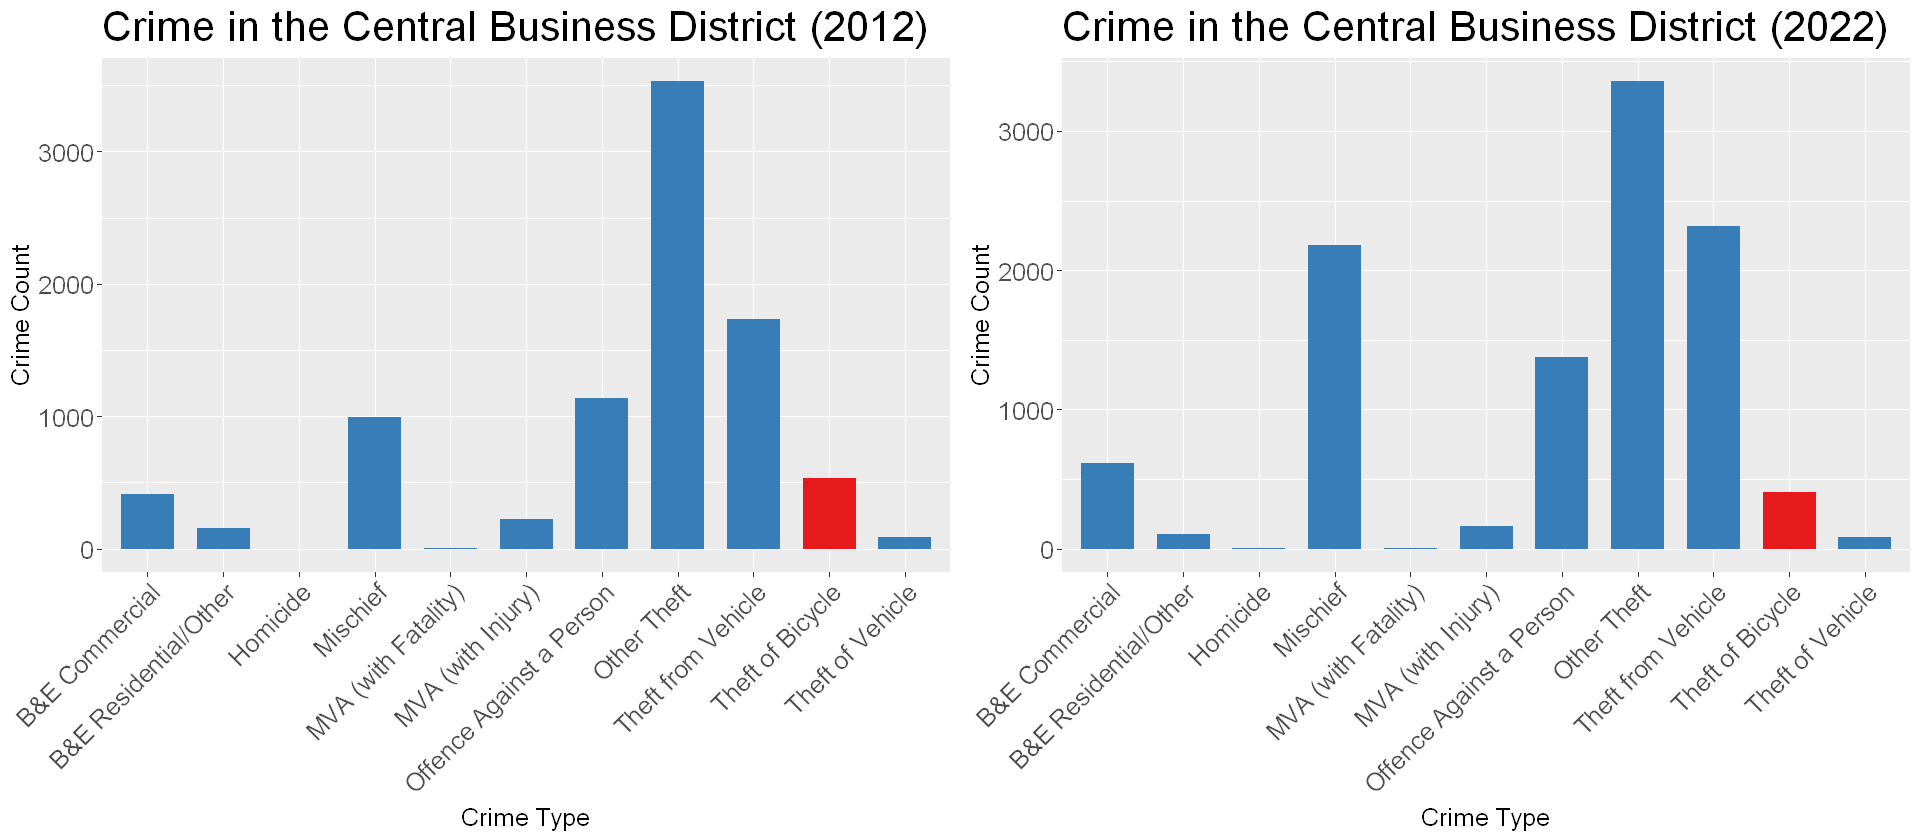

In [4]:
options(repr.plot.width = 16, repr.plot.height = 7)

cbd_2012_dist <- cbd_2012 %>%
  ggplot(aes(x = TYPE,
             fill = factor(ifelse(TYPE=="Theft of Bicycle","Category of Interest","Other")))) +
  geom_bar(width = 0.7, show.legend = FALSE) +
  scale_fill_brewer(palette = "Set1") +
  labs(x = "Crime Type", y = "Crime Count", title = "Crime in the Central Business District (2012)") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 15),
        axis.text.y = element_text(size = 15),
        axis.title = element_text(size = 15),
        legend.text = element_text(size = 15),
        plot.title = element_text(size = 25))

cbd_2022_dist <- cbd_2022 %>%
  ggplot(aes(x = TYPE,
             fill = factor(ifelse(TYPE=="Theft of Bicycle","Category of Interest","Other")))) +
  geom_bar(width = 0.7, show.legend = FALSE) +
  scale_fill_brewer(palette = "Set1") +
  labs(x = "Crime Type", y = "Crime Count", title = "Crime in the Central Business District (2022)") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 15),
        axis.text.y = element_text(size = 15),
        axis.title = element_text(size = 15),
        legend.text = element_text(size = 15),
        plot.title = element_text(size = 25))

plot_grid(cbd_2012_dist, cbd_2022_dist)

Figure 1: Bar plots for types of crime and their respective counts

#### 4. Estimating the proportion of bike thefts

In [5]:
bike_theft_2012 <- cbd_2012 %>%
  summarize(bike_theft = sum(TYPE == "Theft of Bicycle"),
            prop_bike_theft_2012 = bike_theft / n()) %>%
  select(prop_bike_theft_2012)

bike_theft_2022 <- cbd_2022 %>%
  summarize(bike_theft = sum(TYPE == "Theft of Bicycle"),
            prop_bike_theft_2022 = bike_theft / n()) %>%
  select(prop_bike_theft_2022)

diff_in_props_22_12 <- tibble(diff_in_props = pull(bike_theft_2022) - pull(bike_theft_2012))

bike_theft_summary <- tibble(bike_theft_2012, bike_theft_2022, diff_in_props_22_12)
bike_theft_summary


prop_bike_theft_2012,prop_bike_theft_2022,diff_in_props
<dbl>,<dbl>,<dbl>
0.06019726,0.03806294,-0.02213432


Table 5: Summary of initial statistcs

### II. Conducting the Hypothesis Tests

To conduct the hypothesis test, we set the following hypotheses:
Let proportion in 2022 be $P_1$ and 2012 be $P_2$:

- $H_0 = P_1 - P_2 = 0$

- $H_a = P_1 - P_2 < 0$ 

First we will use the simulation based method with the `infer` package to create a null distribution by generating 1000 samples through permutation from the original data, calculating by `"diff in props"`, then getting the p-value.

Using the null distribution, we then visualize it and shade the left tail corresponding to the p-value.

We will also set the significance level &alpha; to 0.05. 

- If $ p < \alpha $, reject $H_0$. This suggests there's a significant difference in the proportions of bike thefts and Project 529 may be effective in reducing bike theft in Downtown.

- If $ p \geq  \alpha $, do not reject $H_0$. This indicates there's not enough evidence to conclude the proportions are different and Project 529 is not effective in reducing bike theft in Downtown.

### Method 1: Simulation-based


First, we will combine our two datasets into a single dataset. 

In [24]:
set.seed(12)

# Combine both data sets into a single data set
bike_theft_2012_2022 <- rbind(mutate(cbd_2012, year = "2012"), mutate(cbd_2022, year = "2022")) |>
    mutate(yn_bt = ifelse(TYPE == "Theft of Bicycle", "yes", "no"))
head(bike_theft_2012_2022)

TYPE,year,yn_bt
<chr>,<chr>,<chr>
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no
B&E Commercial,2012,no


Table 6: Combined data set

We will then generate the null distribution and visualize it with a plot.

replicate,stat
<int>,<dbl>
1,0.0015299154
2,-0.0007534758
3,-0.0030368671
4,-0.0028292860
5,-0.0022065430
6,0.0009071723


Warning message in min(diff(unique_loc)):
"no non-missing arguments to min; returning Inf"


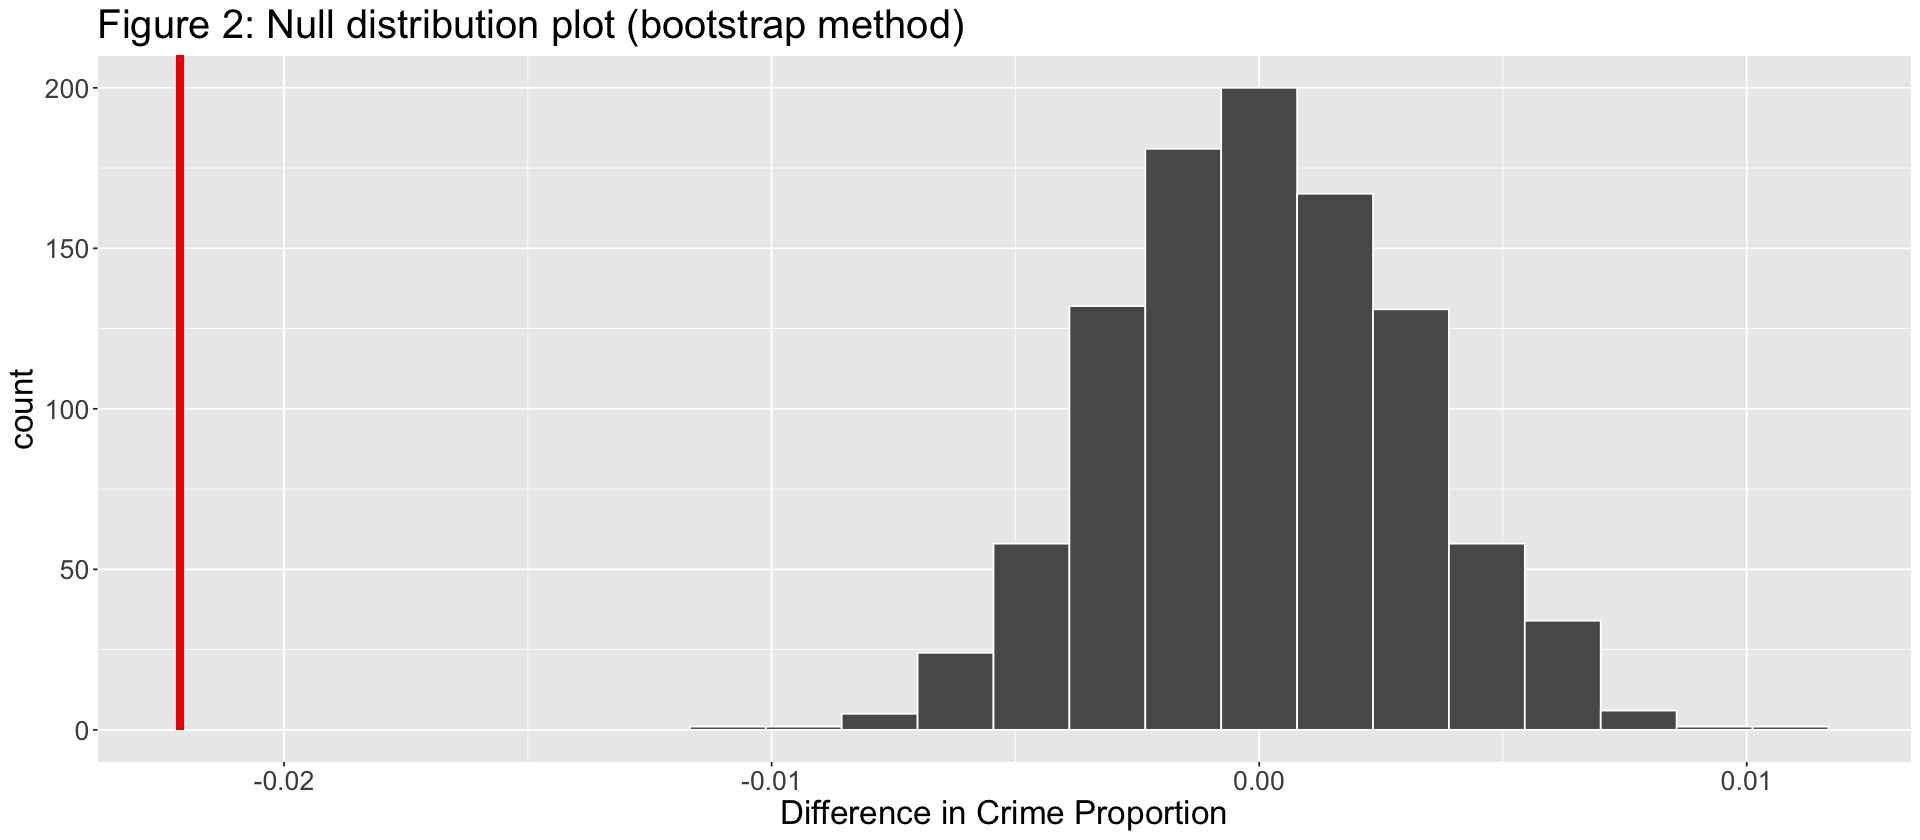

In [25]:
set.seed(12)

# Generate the null distribution
null_dist <- bike_theft_2012_2022 |>
    specify(formula = yn_bt ~ year, success = "yes") |>
    hypothesise(null = "independence") |>
    generate(reps = 1000, type = "permute") |>
    calculate(stat = "diff in props", order = c("2022", "2012"))
head(null_dist)

# Visualize the null distribution
null_dist_vis <- null_dist |>
    visualize(bins = 15) + 
    shade_p_value(obs_stat = pull(diff_in_props_22_12), direction = "left") +
    xlab("Difference in Crime Proportion") + 
    theme(text = element_text(size = 20))

null_dist_vis + ggtitle("Figure 2: Null distribution plot (bootstrap method)")

We will compute for the confidence interval with the percentile method and a confidence level of 95% with get_confidence_interval

In [27]:
set.seed(12)

null_dist_ci_percentile <- null_dist %>%
    get_confidence_interval(type = "percentile", level = 0.95) 

null_dist_ci_percentile


lower_ci,upper_ci
<dbl>,<dbl>
-0.00573542,0.005889117


Table 7: Null distribution (bootstrap method)

Finally, we will shade the confidence intervals on the same plot.

Warning message in min(diff(unique_loc)):
"no non-missing arguments to min; returning Inf"


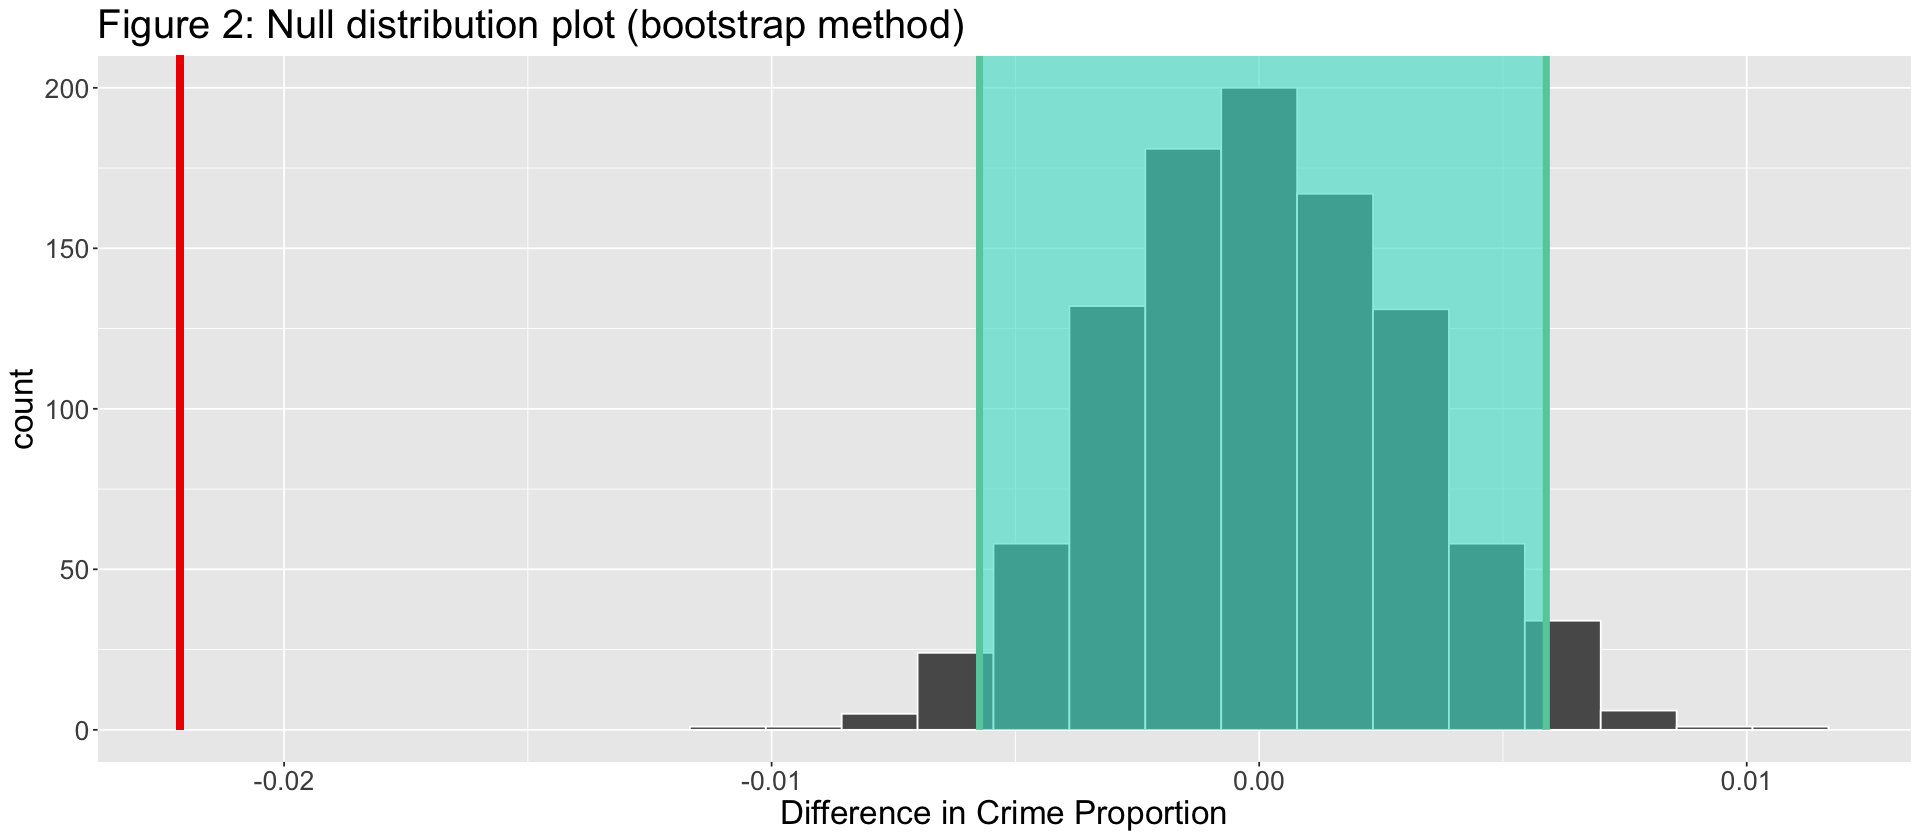

In [26]:

null_dist_vis + shade_confidence_interval(endpoints = null_dist_ci_percentile) + ggtitle("Figure 2: Null distribution plot (bootstrap method)")



### Method 2: CLT based approach

#### 2.1 Perform the test

Here, we use the 2 sample z-test to do our hypothesis test.

Our samples are independent, but we also need to check that $n \hat{p} \geq 10$ and $n(1-\hat{p})\geq 10$ where $ \hat{p} $ is the pooled proportion.

In [7]:
# calculation for pooled proportion
p_diff <- pull(diff_in_props_22_12)
n1 <- nrow(cbd_2012)
n2 <- nrow(cbd_2022)
p1 <- bike_theft_summary$prop_bike_theft_2012
p2 <- bike_theft_summary$prop_bike_theft_2022

p_pooled <- (p1*n1 + p2*n2) / (n1 + n2)

# checking np and n(1-p)
n1*p_pooled
n2*p_pooled

n1*(1 - p_pooled)
n2*(1 - p_pooled)

# calculate test statistic for graph
test_stat <- p_diff / (p_pooled*(1-p_pooled)*(1/n1 + 1/n2))

[1] 424.3702

[1] 510.6298

[1] 8396.63

[1] 10103.37

Since, $n \hat{p} \geq 10$ and $ n (1 - \hat{p}) \geq 10$, using the standard normal distribution to approximate the null-model is valid.

We now use the prop.test() function to help us perform our hypothesis test. We will also broom::tidy() to organize the result.

In [8]:
# set seed
set.seed(12)

null_model <- broom::tidy(
        prop.test(
        x= c(sum(cbd_2022$TYPE == "Theft of Bicycle"),
        sum(cbd_2012$TYPE == "Theft of Bicycle") ), 
        n= c(nrow(cbd_2022),
        nrow(cbd_2012) ), 
        alternative = "less",
        conf.level = 0.95,
        correct= FALSE))
null_model

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.03806294,0.06019726,51.53835,3.510605e-13,1,-1,-0.01696856,2-sample test for equality of proportions without continuity correction,less


Table 8: Result table for hypothesis test

#### 2.2 Plot graph

Here we plot the null distribution with the rejection region shaded in red and out 95% confidence interval shaded in blue to better visualize our results.


We did not plot our test statistic since it will make the null distribution too small to see, but it is in our rejection region ()

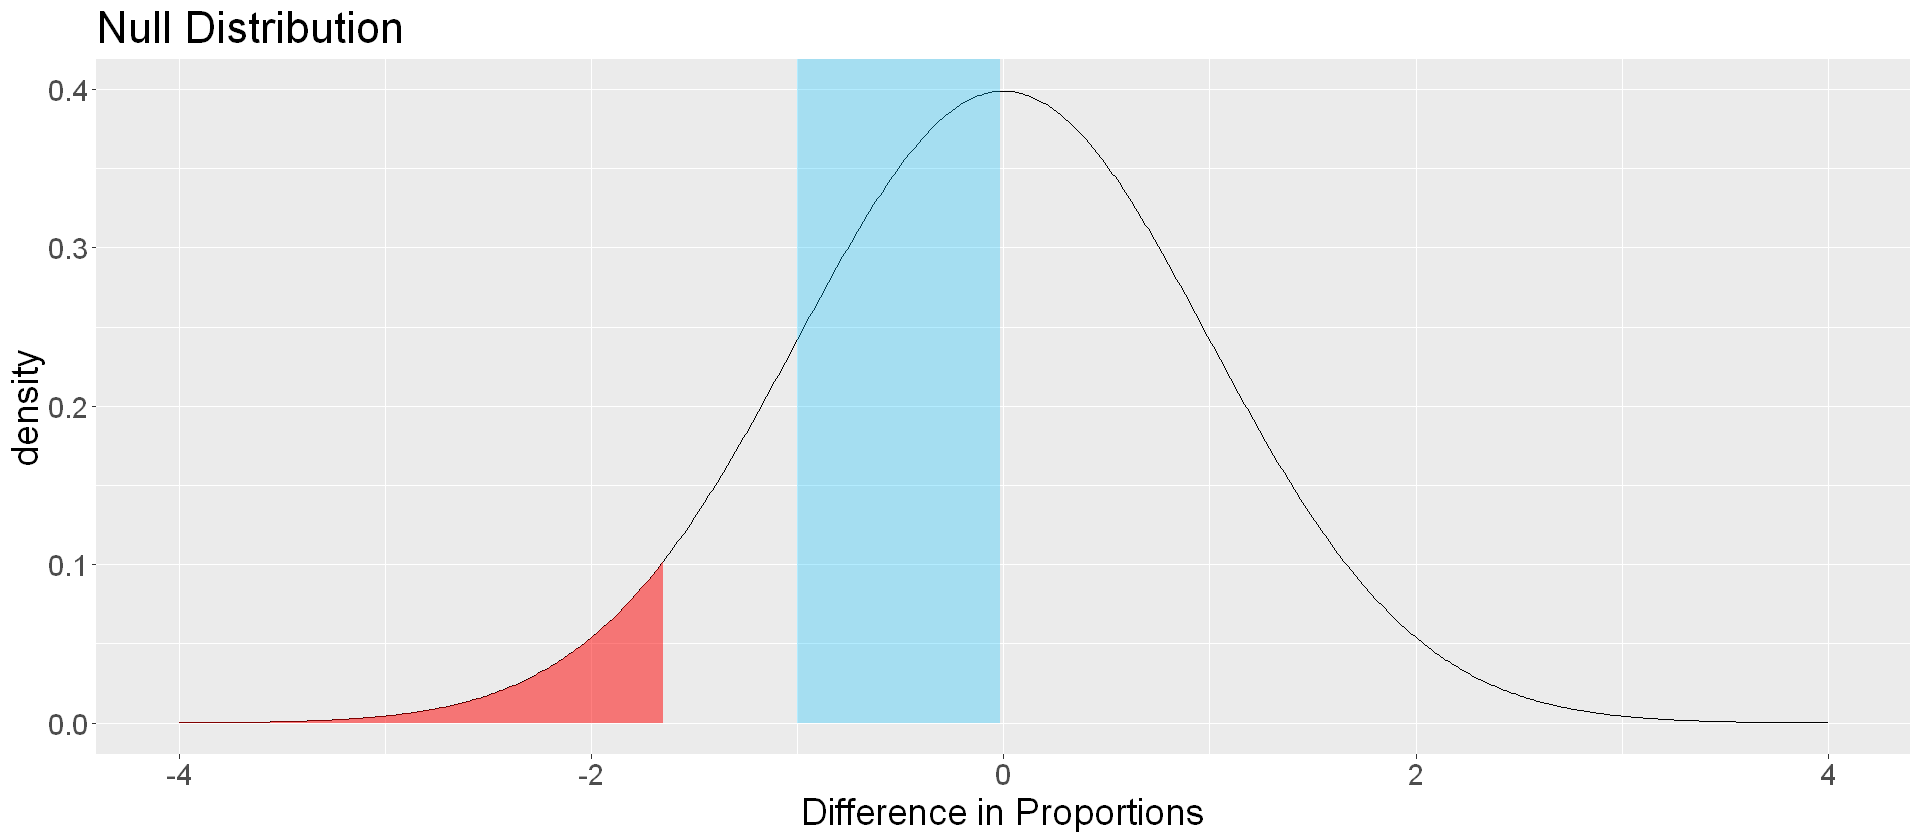

In [9]:
data <- tibble(x = seq(-4, 4, 0.01), density = dnorm(x))
# print(data)

null_plot <- data %>% 
    ggplot() + 
    geom_line(aes(x, density)) +
    geom_ribbon(data %>% filter(x < qnorm(0.05)),
        mapping = aes(x = x, ymax = density, ymin = 0), alpha = 0.5, fill = "red") + 
    annotate("rect", xmin = null_model$conf.low, xmax = null_model$conf.high, ymin = 0, ymax = Inf,
              fill = "deepskyblue", alpha = 0.3) +
    theme(text = element_text(size=22)) + 
    xlab("Difference in Proportions")  +  
    ggtitle("Null Distribution") 

null_plot 

Figure 3: Null distribution (CLT method)

#### 2.3 Interpreting results

Compare the p-value calculate from the z-test with the 0.05 significance level.

In [11]:
null_model$p.value < 0.05

[1] TRUE

Since our p value $(3.51 * 10^{-13})$ is less than our $ \alpha $ value (0.05), we **reject** our null hypothesis that there was no difference in the proportion of bikes thefts for our CLT based hypothesis test.

### III. Interpreting Overall Results

#### Hypothesis test

As shown, the p-values from both the theoretical and simulation based methods are less than the significance level of 0.05. Therefore, for both methods, it is statistically significant, and we reject $H_0$. In other words, the test statistic is very unlikely if we assume the null hypothesis to be true.

This indicates that there's a significant difference in the proportions of bike thefts between 2012 and 2022, and Project 529 may be effective in reducing bike theft in Downtown.

Besides, by comparing the absolute value of the rejection region -1.6, we can see that the test statistic falls beyond it, therefore, reject H0, consistent as the p-vaue's decision.

#### Confidence interval 

For the theoretical based method, the 95% confidence interval we obtained was [-1,	-0.01696856]. This means that there is a 95% chance that we capture the true difference in proportion (of bike thefts in downtown Vancouver out of all possible confidence intervals) , and its value is between -1 and -0.01697.

Since both the lower and upper bound of our CI is negative, it is more likely that Project 529 was effective in decreasing bike theft.

## Discussion

In summary, from our investigation, we have concluded to reject the null hypothesis in both methods, and found the 95% CI which further supports that there is a decrease in bike theft from 2012 to 2022.

In this report, we used 2 methods to conduct the test. However, we believe the bootstrap method is more trustworthy as they may have been a violation of the assumptions needed for the CLT method due to how the data was collected (not random enough). This also explains why our results from the bootstrap and CLT method are different.

Overall, our findings suggest the program was effective in reducing bike theft (good job Vancouver!)

Due to this finding, we can justify the resources that were put into implementing and maintaining the Project 529 program. Furthrmore it can also suggest value in ncreasing resources towards the program, as well as towards establishing similar programs in other cities. 

These results were what we expected to find since there have been studies done which show programs like Project 529 have been effective (Nettle, Nott, & Bateson, 2012), and also because there have been numerous news articles praising this program (McIntyre, 2023).

### Further research and questions

Additional research could examine the resource and cost-effectiveness of Project 529, as well as investigating other cities which have implemented similar programs. Relevent questions may rise up, for example: Is the reduction in bike theft worth the investment? Are there more efficient alternatives? 

## References 

Dataset source: https://geodash.vpd.ca/opendata 

Ballard, J. (2021, February 4). Vancouver still has the most bike thefts per capita among major Canadian cities despite efforts. CBC News. https://www.cbc.ca/news/canada/british-columbia/vancouver-still-has-the-most-bike-thefts-per-capita-among-major-canadian-cities-despite-efforts-1.5898575

Malleson N, Steenbeek W, Andresen MA (2019). Identifying the appropriate spatial resolution for the analysis of crime patterns. PLoS One. 2019 Jun 26;14(6):e0218324. doi: 10.1371/journal.pone.0218324.

McIntyre, G. (2023, June 9). The state of bike thefts in Vancouver. Vancouver Sun. https://vancouversun.com/news/local-news/the-state-of-bike-thefts-in-vancouver

Nettle D, Nott K, Bateson M. 'Cycle thieves, we are watching you': impact of a simple signage intervention against bicycle theft. PLoS One. 2012;7(12):e51738. doi: 10.1371/journal.pone.0051738. Epub 2012 Dec 12. PMID: 23251615; PMCID: PMC3520908.

Vancouver Police Department. (n.d.). Bike theft protection. https://vpd.ca/crime-prevention-safety/bike-theft-protection/
